<a href="https://colab.research.google.com/github/mebeZ/Alpha/blob/master/gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [211]:
import numpy as np
import matplotlib.pyplot as plt

In [212]:
X = np.arange(100)
n = len(X)
noise = np.random.normal(loc=0, scale=10, size=100)
m = 1/2
b = 50
y = m*X + b + noise
y[y>100] = 100

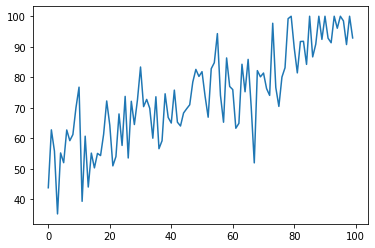

In [213]:
plt.plot(X, y)

In [214]:
class LinearRegression:
  def __init__(self):
    self.params = np.array([0, 0])

  # Gradient descent
  def fit(self, X_train, y_train, n_steps=200, alpha=0.0002, beta=0.08): 
    losses = np.array([])
    for i in range(n_steps):
      # compute new line
      y_pred = self.params[0] * X_train + self.params[1]
      #print(f'y_pred {y_pred[:5]}')
      # compute loss
      loss = (1/n) * np.sum((y_train - y_pred) ** 2)
      #print(f'loss {loss}')
      #print(loss)
      losses = np.append(losses, loss)

      # compute gradient
      delta_m = (2/n) * np.sum(X_train * (y_train - y_pred)) * alpha
      delta_b = (2/n) * np.sum(y_train - y_pred) * beta
      grad = np.array([delta_m, delta_b]) 
      #print(f"+m: {grad[0]} +b {grad[1]}")
      # update params
      self.params = self.params + grad
      #print(f'm={params[0]} b={params[1]}')

    return params, losses

  # predict test labels based on unseen features
  def predict(self, X_test):
    y_pred = self.params[0] * X_test + self.params[1]
    return y_pred

  def compute_loss(self, X_test, y_test):
    return np.sum((y_test - X_test) ** 2)

  # split the data into training and testing datasets
  @staticmethod
  def train_test_split(X, y, shuffle=True, train_size=0.8, test_size=0.2):
    if (shuffle):
      np.random.shuffle(X)
      y = y[X]
    train_index = round(len(X)*train_size)
    print(train_index)
    X_train, y_train = X[:train_index], y[:train_index]
    X_test, y_test = X[train_index:], y[train_index:]
    return X_train, X_test, y_train, y_test

In [215]:
X_train, X_test, y_train, y_test = LinearRegression.train_test_split(X, y)
print(y_test)

80
[ 75.7759924   55.79709332  44.00114194  83.10901801  91.3121779
  99.20506687  72.11842719 100.          74.57564215  84.76944168
  86.32870572  85.85370877  72.54809629  91.70986746  92.88757397
  82.80049913  64.01509569  83.35322755  61.20553072  62.74918719]


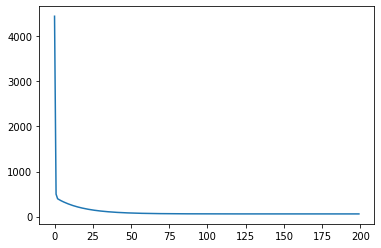

In [216]:
model = LinearRegression()

params, losses = model.fit(X_train, y_train)
#print(losses)

plt.plot(np.arange(len(losses)), losses)
plt.show()

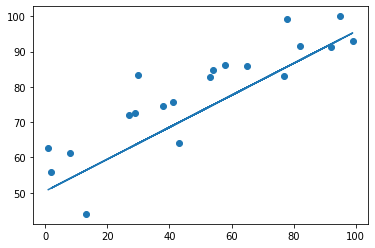

In [217]:
y_pred = model.predict(X_test)
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred)
plt.show()   

In [218]:
loss = model.compute_loss(X_test, y_pred)
print(loss)

16569.489004776948
